### Naive Bayes

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
os.getcwd()

'C:\\Users\\jaych\\Downloads\\iAnalyst\\ML\\Naive Bayes'

In [3]:
#Importing a dataset and making a copy
Data = pd.read_csv('C:\\Users\\jaych\\Downloads\\iAnalyst\\ML\\Logistic Regression\\Churn_Modelling.csv')
df = Data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(df.columns[0:3],axis = 1,inplace = True)

In [5]:
#Extracting object data type columns
cat_data = df[df.columns[df.dtypes == 'object']]

In [6]:
#Converting to category data type
cat_data = cat_data.astype('category')
cat_data.dtypes

Geography    category
Gender       category
dtype: object

In [7]:
cat_data["Gender"].cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Length: 10000, dtype: int8

In [8]:
for i in cat_data.columns:    
    cat_data[i] = cat_data[i].cat.codes

In [9]:
df = pd.concat([df.drop(cat_data.columns,axis=1),cat_data],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [10]:
#df = pd.get_dummies(df,columns = df.columns[df.dtypes == 'object'],drop_first=True)
#df.head()

In [11]:
df.shape

(10000, 11)

In [12]:
features = df.columns[df.columns != 'Exited']
X = df.drop('Exited',axis=1)
y = df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
from sklearn.model_selection import KFold,train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [14]:
def  NaiveBayes(X_train, X_test, y_train, y_test):
    '''A function to apply Naive Bayes Algorithm.
     It  requires splitted dataframe of data into 
     training and testing sets.
     '''   
    
    classifier = GaussianNB()
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test,y_pred))
    print('AUC:- ',roc_auc_score(y_test,y_pred))
    fpr,tpr,threshold = roc_curve(y_test,y_pred)
    plt.plot(fpr,tpr,label = 'NB(Area = %0.2f)' % roc_auc_score(y_test,y_pred))
    out = np.zeros(X_test.shape[0])
    prob = pd.DataFrame(classifier.predict_proba(X_test))
    out[prob.index[prob[1]>0.22]] = 1

    print('-'*40,'After adjusting 1 values','-'*40,'\n')
    print(classification_report(y_test,out))
    print('AUC():- ',roc_auc_score(y_test,out))
    
    fpr,tpr,threshold = roc_curve(y_test,out)
    plt.plot(fpr,tpr,label = 'NB(After Adjusting)(Area = %0.2f)' % roc_auc_score(y_test,out))
    plt.plot([0,1],[0,1],'r--')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics Curve')
    plt.plot()

    print('*'*40*3 )

In [15]:
def Split_data(folds,df,Output):
    '''
    A function to split the data either by hold-out method or cross-validation method.
    To use this function you should mention the target variable.
    Parameters
    folds :- Number of times you want data to split the data
             1 = Hold-out Method  & >2 = Cross-validation
    df :- DataFrame Containing Dataset
    Output :- Dependent_Variable(Feature you want to study)
    '''
    X = df.drop(Output,axis=1)
    y = df[Output]
    if folds > 1 :
        kfold = KFold(n_splits=folds,shuffle=True,random_state=101)
        for train_idx, test_idx in kfold.split(df):
            #print(train_idx,test_idx)
            X_train,X_test = X.iloc[train_idx],X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx],y.iloc[test_idx]
            NaiveBayes(X_train, X_test, y_train, y_test)
            
    else:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)
        NaiveBayes(X_train, X_test, y_train, y_test)
        
        

- The confusion matrix is an N x N table (where N is the number of classes) that contains the number of correct and incorrect predictions of the classification model.
- To create the confusion matrix, we can use sklearn confusion_matrix(), which takes the real values (y_test) and the predicted values (y_predict)

* Accuracy:
The accuracy returns the proportion of correct predictions.
- Accuracy = (TP + TN)/(TP + TN + FP + FN) = (66 + 40)/(66 + 40 + 1 + 7) = 0.93 = 93%
* Precision:
The precision returns the proportion of true positives among all the values predicted as positive.
- Precision = TP/(TP + FP) = 40/(40 + 1) = 0.98 = 98%
* Recall:
The recall returns the proportion of positive values correctly predicted.
- Recall = TP/(TP + FN) = 40/(40 + 7) = 0.85 = 85%
* Specificity:
The specificity returns the proportion of negative values correctly predicted.
* Specificity: TN/ (TN + FP) = 66/(66 + 1) = 0.99 = 99%
* F1-score:
The f1-score is the harmonic mean of precision and recall. It is often used to compare classifiers.
- F1-score = (2 x Precision x Recall)/(Precision + Recall) = 0.91 = 91%
The harmonic mean gives more weight to the lower value, so a high F1-score means that both precision and recall are high.

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1577
           1       0.30      0.07      0.11       423

    accuracy                           0.77      2000
   macro avg       0.55      0.51      0.49      2000
weighted avg       0.69      0.77      0.71      2000

AUC:-  0.5121711182168016
---------------------------------------- After adjusting 1 values ---------------------------------------- 

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1577
           1       0.42      0.64      0.51       423

    accuracy                           0.74      2000
   macro avg       0.65      0.70      0.66      2000
weighted avg       0.79      0.74      0.75      2000

AUC():-  0.7017513877833095
************************************************************************************************************************


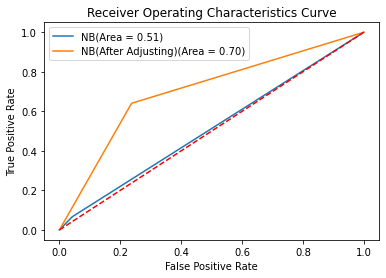

In [16]:
Split_data(1,df,'Exited')

### Using Holdout Method

              precision    recall  f1-score   support

           0       0.81      0.96      0.87      3994
           1       0.33      0.09      0.14      1006

    accuracy                           0.78      5000
   macro avg       0.57      0.52      0.51      5000
weighted avg       0.71      0.78      0.73      5000

AUC:-  0.5212075070856783
---------------------------------------- After adjusting 1 values ---------------------------------------- 

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      3994
           1       0.39      0.63      0.48      1006

    accuracy                           0.73      5000
   macro avg       0.64      0.69      0.65      5000
weighted avg       0.79      0.73      0.75      5000

AUC():-  0.6910370525967878
************************************************************************************************************************
              precision    recall  f1-score   support

       

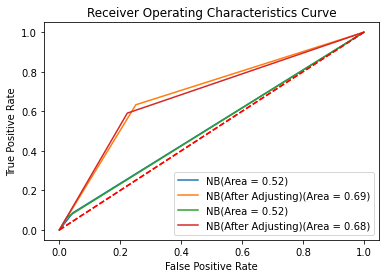

In [17]:
#2-folds cross-validation
Split_data(2,df,'Exited')

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#### Standard Scalar on X

In [19]:
StandScaler = StandardScaler()
X = pd.DataFrame(StandScaler.fit_transform(df.drop('Exited',axis=1)),columns=df.columns.drop('Exited'))
y = df['Exited']

In [20]:
Std_df= pd.concat([X,y],axis=1)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1577
           1       0.76      0.26      0.39       423

    accuracy                           0.83      2000
   macro avg       0.79      0.62      0.64      2000
weighted avg       0.82      0.83      0.79      2000

AUC:-  0.6189266210043608
---------------------------------------- After adjusting 1 values ---------------------------------------- 

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1577
           1       0.47      0.69      0.56       423

    accuracy                           0.77      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.81      0.77      0.78      2000

AUC():-  0.7383914156064347
************************************************************************************************************************


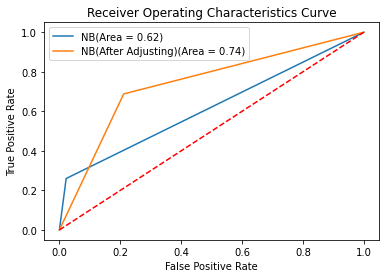

In [21]:
Split_data(1,Std_df,'Exited')

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3994
           1       0.70      0.26      0.38      1006

    accuracy                           0.83      5000
   macro avg       0.77      0.62      0.64      5000
weighted avg       0.81      0.83      0.80      5000

AUC:-  0.6175635222217023
---------------------------------------- After adjusting 1 values ---------------------------------------- 

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      3994
           1       0.44      0.68      0.53      1006

    accuracy                           0.76      5000
   macro avg       0.67      0.73      0.69      5000
weighted avg       0.81      0.76      0.78      5000

AUC():-  0.7319045168149839
************************************************************************************************************************
              precision    recall  f1-score   support

       

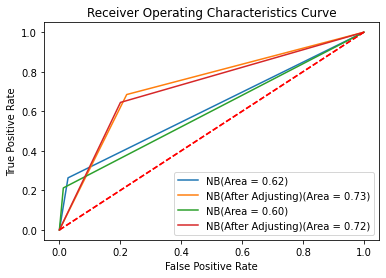

In [22]:
#2-folds cross-validation
Split_data(2,Std_df,'Exited')

#### Min-Max Scalar on X

In [23]:
MinMax = MinMaxScaler()
X = pd.DataFrame(MinMax.fit_transform(df.drop('Exited',axis=1)),columns=df.columns.drop('Exited'))
y = df['Exited']

In [24]:
MinMax_df  = pd.concat([X,y],axis=1)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1577
           1       0.76      0.26      0.39       423

    accuracy                           0.83      2000
   macro avg       0.79      0.62      0.64      2000
weighted avg       0.82      0.83      0.79      2000

AUC:-  0.6189266210043608
---------------------------------------- After adjusting 1 values ---------------------------------------- 

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1577
           1       0.47      0.69      0.56       423

    accuracy                           0.77      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.81      0.77      0.78      2000

AUC():-  0.7383914156064347
************************************************************************************************************************


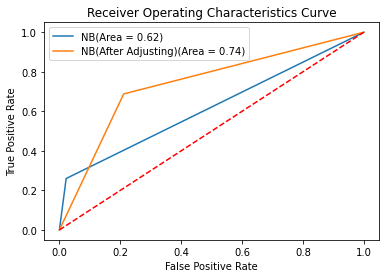

In [25]:
Split_data(1,MinMax_df,'Exited')

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3994
           1       0.70      0.26      0.38      1006

    accuracy                           0.83      5000
   macro avg       0.77      0.62      0.64      5000
weighted avg       0.81      0.83      0.80      5000

AUC:-  0.6175635222217023
---------------------------------------- After adjusting 1 values ---------------------------------------- 

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      3994
           1       0.44      0.68      0.53      1006

    accuracy                           0.76      5000
   macro avg       0.67      0.73      0.69      5000
weighted avg       0.81      0.76      0.78      5000

AUC():-  0.7319045168149839
************************************************************************************************************************
              precision    recall  f1-score   support

       

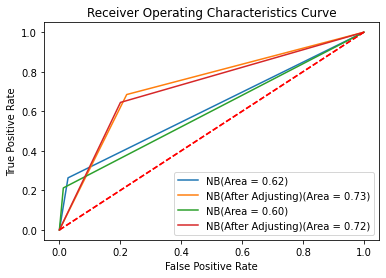

In [26]:
#2-folds cross-validation
Split_data(2,MinMax_df,'Exited')

After MinMax and Standard Scaling AUC is maximum